## 1)Importing the Libraries

Twitter API keys:

API Key
mLktDWVuMOC2qh2ZrdaNrwwww

API Key Secret
7KRlr8YBpqER9IrPiugQ9wP6IFDy6caZWd1l8ioWgY9LIIx69L


Bearer Token
AAAAAAAAAAAAAAAAAAAAAMSdjQEAAAAA0S%2FDJP1usZ5hr4qtaRrLqLugm0k%3Dtum0af3K2Ks1oXc27pMOpgaGZuF1WtxD1VEwHgWuRj3AbuVrqY

Access Token
1545415916040720385-GxnjhWzMXghLFkTNnRCFw9Ds6ZggcJ


Access Token Secret
s9DZED2mjPIqJt7lwtxoCtBf9mwOkv8IcaiJkuFNsSzPG


In [10]:
#pip install textblob
from textblob import TextBlob

In [11]:
#pip install tweepy
import tweepy

In [12]:
import matplotlib.pyplot as plt

## 2)Connecting with the Twitter API

In [13]:
#Store twitter app's token and key
consumer_key = "mLktDWVuMOC2qh2ZrdaNrwwww"
consumer_sercret = "7KRlr8YBpqER9IrPiugQ9wP6IFDy6caZWd1l8ioWgY9LIIx69L"
access_token = "1545415916040720385-GxnjhWzMXghLFkTNnRCFw9Ds6ZggcJ"
access_token_secret = "s9DZED2mjPIqJt7lwtxoCtBf9mwOkv8IcaiJkuFNsSzPG"

In [14]:
#Setup authtication
auth = tweepy.OAuthHandler(consumer_key, consumer_sercret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAMSdjQEAAAAA0S%2FDJP1usZ5hr4qtaRrLqLugm0k%3Dtum0af3K2Ks1oXc27pMOpgaGZuF1WtxD1VEwHgWuRj3AbuVrqY')

In [15]:
api

In [16]:
#Define the terms for search and search numbers
search_term = "Money Heist"
no_of_tweet = 1000

In [17]:
# tweets = tweepy.Cursor(api.search_tweets, q = search_term).items(no_of_tweet)
# tweets = api.search_tweets(q = search_term).items(no_of_tweet)

#paginator: function to search twits
#client.search_recent_tweets: search twits with search term
tweets = tweepy.Paginator(client.search_recent_tweets, search_term, max_results=100).flatten(limit=no_of_tweet)

In [18]:
tweets

<generator object Paginator.flatten at 0x0000022024CE0EC8>

## 3)Understand the working of TextBlob

In [19]:
#Use sentiment polarity to tell sentiment
#positive>0 negative<0 neutral=0

In [20]:
a = "I am a bad Circket player"
b = "I am a good player"
c = "I am a Circket player"

In [21]:
TextBlob(a).sentiment.polarity

-0.6999999999999998

In [22]:
TextBlob(b).sentiment.polarity

0.7

In [23]:
TextBlob(c).sentiment.polarity

0.0

## 4)Iterate the data and convert the result in percentage

In [24]:
positive = 0
negative = 0
neutral  = 0
polarity = 0

In [25]:
count = 0
for tweet in tweets:    #Iterate through all the tweets found, and analyze sentiemnt for each of it
    if count < 10:
        print(tweet)
        count+=1
    analysis = TextBlob(tweet.text) #.text就是提取帖文中的text部分，不管别的没用的信息
    polarity += analysis.sentiment.polarity
    
    #这里就是分别做统计
    if(analysis.sentiment.polarity == 0):
       neutral += 1

    elif(analysis.sentiment.polarity < 0.00):
       negative += 1

    elif(analysis.sentiment.polarity > 0.00):
       positive += 1

@Syiraroo Aar sbb aku baru habiskan Money Heist Korea
Money heist udh tayang tinggal squid game yg belum
@deasappear Siapp thank u, met nonton deee !! Money heist udh nnton blm ? Yg S2 ???
RT @sanshinetoday: ATEEZ as komplotan Money Heist💰

ini thread isi edit iseng-iseng hasil gabutku!

⚠️warning! agak spoiler(?) https://t.co…
Mi sono appena sparato:
 S01 | E10 of Money Heist: Korea - Joint Economic Area! #moneyheist  https://t.co/Xvtz43fJjs #tvtime https://t.co/ihTNtWGtf9
@kdrama_menfess money heist
RT @Thompsonklay: @hodgetwins @POTUS Ukraine running the greatest money heist of all time.
RT @Mrdj255: Niko available for any heist or any illegal activities that involving money …🥱🚶‍♂️😌
List to keep up with webtoons and shows I’m watching:
Hometown chachacha
Operation true love
Money heist
Singles inferno
Wednesday 
Little women
Crash landing on you
Act like you love me 
Sex life of college girls
Extraordinary you
Young adult matters
@kdrama_menfess Dia main di money heist jg kok. Tp sa

In [26]:
positive

306

In [27]:
negative

103

In [28]:
neutral

591

In [166]:
polarity

37.55943109668104

In [30]:
# Define a function to calculate the percentage
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [31]:
positive = percentage(positive, no_of_tweet)
negative = percentage(negative, no_of_tweet)
neutral  = percentage(neutral, no_of_tweet)
polarity  = percentage(polarity, no_of_tweet)

In [32]:
#Formant results
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

In [33]:
print("Reaction of the people on " + search_term + 
      " By analyzing " + str(no_of_tweet) + " Tweets ")

if (polarity == 0):
    print(" is 'Neutral'")
    
elif (polarity < 0.00):
    print("is 'Negative'")
    
elif (polarity > 0.00):
    print("is 'Positive'")

Reaction of the people on Money Heist By analyzing 1000 Tweets 
is 'Positive'


## Getting the result of the Analysis

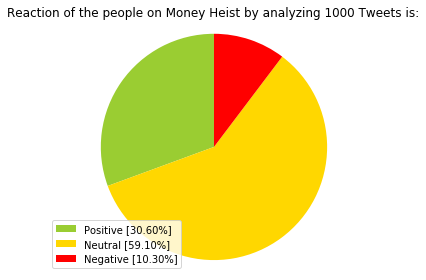

In [34]:
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweet) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()